In [29]:
import pandas as pd

In [30]:
resultados_exames = pd.read_csv("exames.csv")

In [31]:
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [32]:
#Veficiando a existencia de dados nulos
resultados_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

Separando os dados para TREINO e TESTE


In [33]:
#Pegando apenas as colunas "EXAMES"
valores_exames = resultados_exames.drop(columns=["id", "diagnostico"])

#Pegando apenas a coluna "DIAGNOSTICO"
diagnostico = resultados_exames.diagnostico

#Dropando a columa "exame_33" pois é nula
valores_exames_v1 = valores_exames.drop(columns="exame_33")


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143 #Definindo o valor de aleatoriedade
random.seed(SEED)


#valor padrão do test_size = 0.25
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, diagnostico, test_size= 0.3)

classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x, treino_y)
print(f"Resultado da classificação {classificador.score(teste_x, teste_y) * 100 :.2f}%")


#valores_exames -> toda base de dados menos "ID" e "Diagnostico"
#"n_estimator" -> quantidade de árvores de decisão que será construida no modelo
#"score" -> recebe os dados de teste e retorna uma acurácia 

Resultado da classificação 92.40%


In [35]:
print("TREINO_X")
treino_x.head()

TREINO_X


,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
268,12.87,16.21,82.38,103.78,512.2,0.09425,0.06219,0.03900,0.01615,0.2010,...,23.64,89.27,597.5,0.1256,0.1808,0.1992,0.786,0.0578,0.3604,0.07062
422,11.61,16.02,75.46,103.78,408.2,0.10880,0.11680,0.07097,0.04497,0.1886,...,19.67,81.93,475.7,0.1415,0.2170,0.2302,0.786,0.1105,0.2787,0.07427
168,17.47,24.68,116.10,103.78,984.6,0.10490,0.16030,0.21590,0.10430,0.1538,...,32.33,155.30,1660.0,0.1376,0.3830,0.4890,0.786,0.1721,0.2160,0.09300
501,13.82,24.49,92.33,103.78,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,...,32.94,106.00,788.0,0.1794,0.3966,0.3381,0.786,0.1521,0.3651,0.11830
563,20.92,25.09,143.00,103.78,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.786,0.2542,0.2929,0.09873


In [36]:
print("TESTE_X")
teste_x.head()

TESTE_X


,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
550,10.86,21.48,68.51,103.78,360.5,0.07431,0.04227,0.00000,0.00000,0.1661,...,24.77,74.08,412.3,0.1001,0.07348,0.00000,0.786,0.00000,0.2458,0.06592
405,10.94,18.59,70.39,103.78,370.0,0.10040,0.07460,0.04944,0.02932,0.1486,...,25.58,82.76,472.4,0.1363,0.16440,0.14120,0.786,0.07887,0.2251,0.07732
239,17.46,39.28,113.40,103.78,920.6,0.09812,0.12980,0.14170,0.08811,0.1809,...,44.87,141.20,1408.0,0.1365,0.37350,0.32410,0.786,0.20660,0.2853,0.08496
76,13.53,10.94,87.91,103.78,559.2,0.12910,0.10470,0.06877,0.06556,0.2403,...,12.49,91.36,605.5,0.1451,0.13790,0.08539,0.786,0.07407,0.2710,0.07191
458,13.00,25.13,82.61,103.78,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,...,31.88,91.06,628.5,0.1218,0.10930,0.04462,0.786,0.05921,0.2306,0.06291


In [37]:
print("TESTE_Y")
teste_y.head()

TESTE_Y


550    B
405    B
239    M
76     B
458    B
Name: diagnostico, dtype: object

In [38]:
print("TREINO_Y")
treino_y.head()

TREINO_Y


268    B
422    B
168    M
501    M
563    M
Name: diagnostico, dtype: object

In [39]:
#Utilizando do dummy classifier
from sklearn.dummy import DummyClassifier

SEED = 123143
random.seed(SEED)

classificador_bobo = DummyClassifier(strategy= "most_frequent")
classificador_bobo.fit(treino_x, treino_y)
print(f"Resultado da classificação boba {classificador_bobo.score(teste_x, teste_y) * 100 :.2f}%")

Resultado da classificação boba 66.67%


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2,
                                columns = valores_exames_v1.keys())



In [43]:
def grafico_violino(valores, inicio, fim):
    dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis = 1)
    dados_plot = pd.melt(dados_plot, id_vars="diagnostico", 
                 var_name="exames",
                 value_name="valores")

    plt.figure(figsize=(10,10))

    sns.violinplot(x = "exames", y = "valores", 
               hue = "diagnostico", data = dados_plot, split=True)

    plt.xticks(rotation = 90)

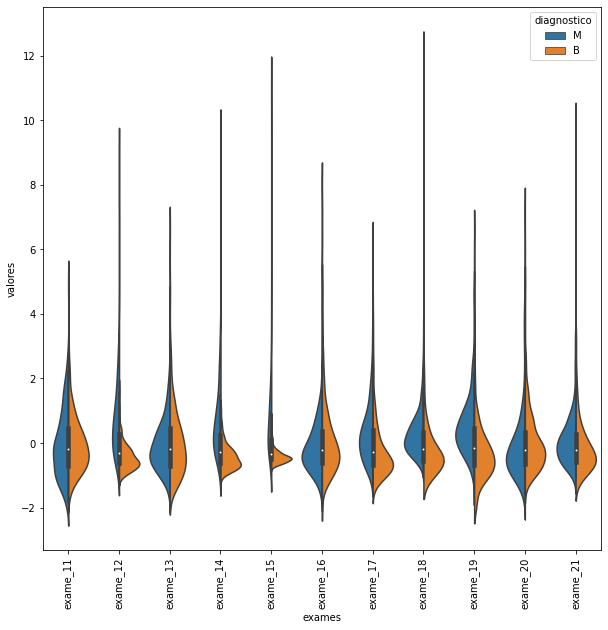

In [44]:
grafico_violino(valores_exames_v2, 10, 21)

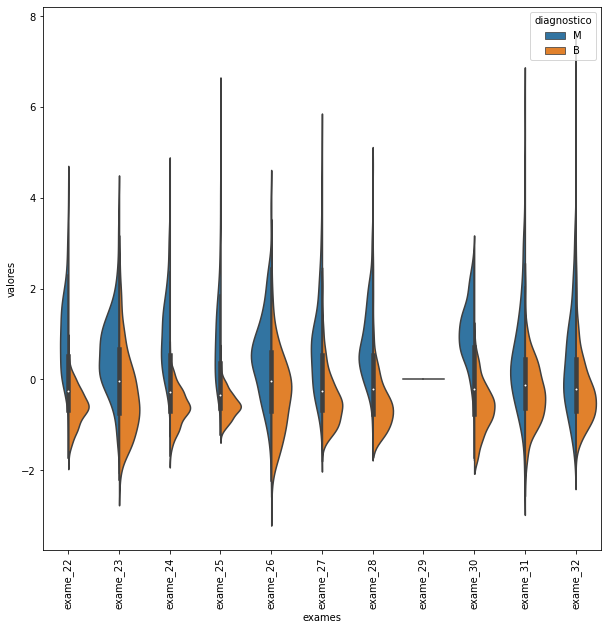

In [46]:
grafico_violino(valores_exames_v2, 21, 32)

In [49]:
valores_exames_v3 = valores_exames_v2.drop(columns=["exame_29", "exame_4"])

def classificar(valores):

    SEED = 1234
    random.seed(SEED)
    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size= 0.3)

    classificador = RandomForestClassifier(n_estimators=100)
    classificador.fit(treino_x, treino_y)
    print(f"Resultado da classificação {classificador.score(teste_x, teste_y) * 100 :.2f}%")

classificar(valores_exames_v3)

    

Resultado da classificação 92.98%
